In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

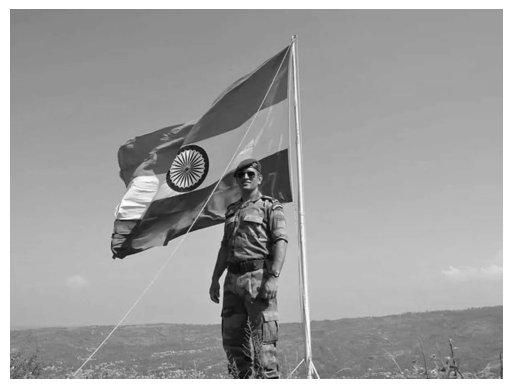

In [2]:
img = cv2.imread("C:\\Users\\barat\\Downloads\\Dhoni.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

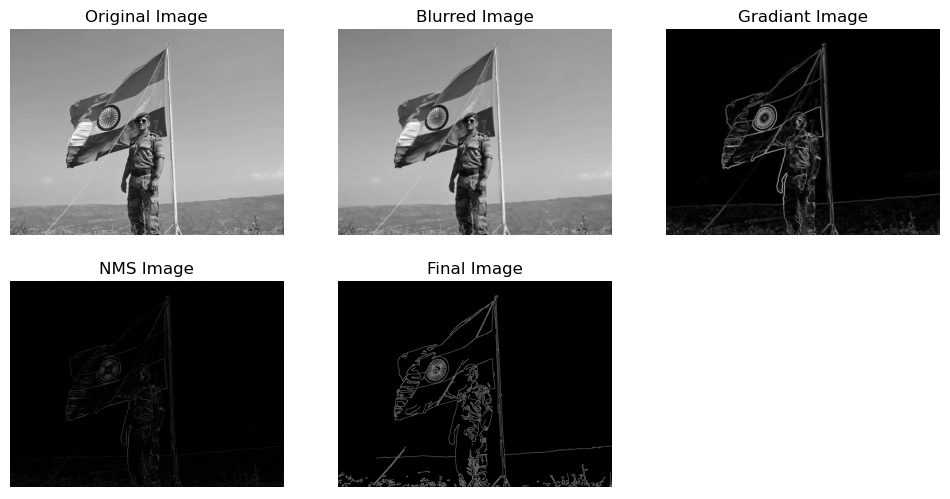

In [13]:
def apply_gaussian_blur(image, kernel_size=(5, 5), sigma=1.4):
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma) 
    return blurred_image

def compute_gradients(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  
    magnitude = cv2.magnitude(grad_x, grad_y) 
    angle = cv2.phase(grad_x, grad_y, angleInDegrees=True)
    return magnitude, angle

def non_maximum_suppression(magnitude, angle):
    height, width = magnitude.shape
    nms_image = np.zeros_like(magnitude)
    angle = angle % 180 

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] < 180):
                neighbor1 = magnitude[i, j - 1]
                neighbor2 = magnitude[i, j + 1]
            elif (22.5 <= angle[i, j] < 67.5):
                neighbor1 = magnitude[i - 1, j + 1]
                neighbor2 = magnitude[i + 1, j - 1]
            elif (67.5 <= angle[i, j] < 112.5):
                neighbor1 = magnitude[i - 1, j]
                neighbor2 = magnitude[i + 1, j]
            elif (112.5 <= angle[i, j] < 157.5):
                neighbor1 = magnitude[i - 1, j - 1]
                neighbor2 = magnitude[i + 1, j + 1]

            if (magnitude[i, j] >= neighbor1) and (magnitude[i, j] >= neighbor2):
                nms_image[i, j] = magnitude[i, j]
            else:
                nms_image[i, j] = 0

    return nms_image

def apply_canny_edge_detection(image, low_threshold=50, high_threshold=150):
    edges = cv2.Canny(image, low_threshold, high_threshold)
    return edges

def canny_edge_detection(image):
    blurred_image = apply_gaussian_blur(image)
    magnitude, angle = compute_gradients(blurred_image)
    nms_image = non_maximum_suppression(magnitude, angle)
    edges = apply_canny_edge_detection(blurred_image)
    
    images = [image,blurred_image,magnitude,nms_image,edges]
    titles = ["Original Image","Blurred Image","Gradiant Image","NMS Image","Final Image"]
    fig,axes = plt.subplots(2,3,figsize=(12,6))
    axes = axes.ravel()
    for i in range(5):
        axes[i].imshow(images[i],cmap='gray')
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    axes[5].axis('off')

canny_edge_detection(gray)



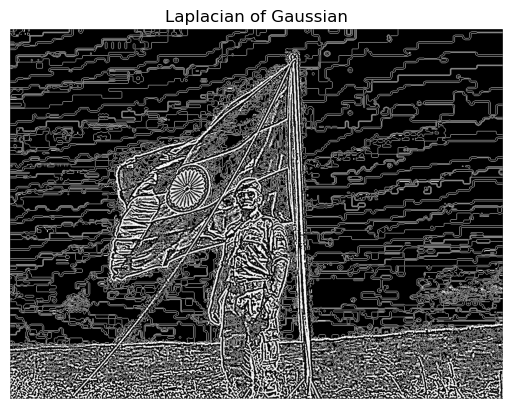

In [16]:
def apply_gaussian_blur(image, sigma, kernel_size=(5, 5)):
    """Applies Gaussian blur to the image."""
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigma) 
    return blurred_image

def laplacian_filter(image):
    """Applies the Laplacian filter manually using a convolution operation."""
    laplacian_kernel = np.array([[0, 1, 0],
                                  [1, -4, 1],
                                  [0, 1, 0]], dtype=np.float32)
    
    laplacian_image = convolve(image, laplacian_kernel, mode='constant', cval=0.0)
    return laplacian_image

def laplacian_of_gaussian(image, sigma):
    """Applies Gaussian blur followed by the Laplacian filter."""
    blurred_image = apply_gaussian_blur(image, sigma)
    log_image = laplacian_filter(blurred_image)
    return log_image

# Load grayscale image
gray = cv2.imread("C:\\Users\\barat\\Downloads\\Dhoni.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Laplacian of Gaussian
sigma = 1.4
log_result = laplacian_of_gaussian(gray, sigma)

# Display the result
plt.imshow(log_result, cmap='gray')
plt.title("Laplacian of Gaussian")
plt.axis('off')
plt.show()


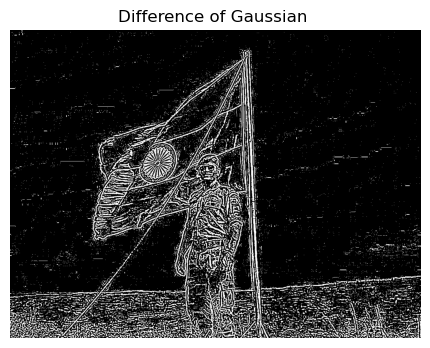

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_gaussian_blur(image, sigma, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, sigma)

def difference_of_gaussians(image, sigma):
    sigma1 = sigma * np.sqrt(2)  
    sigma2 = sigma / np.sqrt(2)  
    
    blurred_image_1 = apply_gaussian_blur(image, sigma1)
    blurred_image_2 = apply_gaussian_blur(image, sigma2)
    
    dog_image = blurred_image_1 - blurred_image_2
    return dog_image

def dog(image, sigma):
    return difference_of_gaussians(image, sigma)

sigma = 1.4  

dog_result = dog(gray, sigma)

plt.figure(figsize=(6,4))
plt.imshow(dog_result, cmap='gray')
plt.title("Difference of Gaussian ")
plt.axis('off')
plt.show()


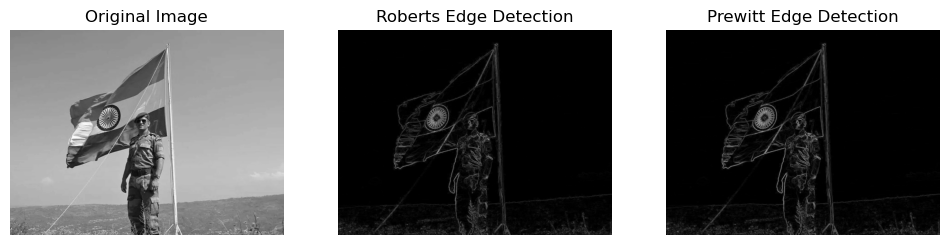

In [12]:
def roberts_filter(image):

    kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
    kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)

    grad_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)

    roberts_edge = np.sqrt(grad_x**2 + grad_y**2)
    roberts_edge = cv2.normalize(roberts_edge, None, 0, 255, cv2.NORM_MINMAX)
    
    return np.uint8(roberts_edge)

def prewitt_filter(image):
    
    kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32)
    kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32)

    grad_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)

    prewitt_edge = np.sqrt(grad_x**2 + grad_y**2)
    prewitt_edge = cv2.normalize(prewitt_edge, None, 0, 255, cv2.NORM_MINMAX)
    
    return np.uint8(prewitt_edge)
    

filters = {
    "Original Image": gray,
    "Roberts Edge Detection": roberts_filter(gray),
    "Prewitt Edge Detection": prewitt_filter(gray)
}

plt.figure(figsize=(12, 6))
for i, (title, result) in enumerate(filters.items(), 1):
    plt.subplot(1, 3, i)
    plt.imshow(result, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()